## Importing Libraries

In [1]:
#importing all the required libraries & mounting google drive.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import nltk
import nltk as nlp
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk_stops_words = nltk.corpus.stopwords.words('english')
lemma = nlp.WordNetLemmatizer()
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,pair_confusion_matrix,classification_report
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA,TruncatedSVD
from tensorflow import keras
from collections import Counter
import plotly.express as px
import gensim
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, BertModel
import torch
from keras.layers import Bidirectional,Dropout
from nltk import ngrams
from nltk.util import bigrams
from collections import Counter
from nltk import pos_tag
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\manor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
c:\Users\manor\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manor\AppData\Roaming\nltk_data..

True

In [2]:
import sys
!{sys.executable} -m pip install plotly


## Importing Dataset

In [3]:
#importing data into dataframe
df_fake_job_pos_og = pd.read_csv('C:/NLP project/dataset_files/fake_job_postings.csv')
df_syn_fake_job_pos = pd.read_csv('C:/NLP project/dataset_files/synthetic_dataset.csv')

In [4]:
#checking shape and number of columns
df_fake_job_pos_og.shape

(17880, 18)

In [5]:
#Checking shape for synthetic data we generated from Gretel
df_syn_fake_job_pos.shape

(5000, 18)

In [6]:
#Checking data type and data present in the columns
df_fake_job_pos_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
#Checking info for synthetic data
df_syn_fake_job_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               5000 non-null   int64 
 1   title                5000 non-null   object
 2   location             4271 non-null   object
 3   department           1769 non-null   object
 4   salary_range         1633 non-null   object
 5   company_profile      1521 non-null   object
 6   description          5000 non-null   object
 7   requirements         4995 non-null   object
 8   benefits             5000 non-null   object
 9   telecommuting        5000 non-null   int64 
 10  has_company_logo     5000 non-null   int64 
 11  has_questions        5000 non-null   int64 
 12  employment_type      3912 non-null   object
 13  required_experience  2633 non-null   object
 14  required_education   2819 non-null   object
 15  industry             4050 non-null   object
 16  functi

#### Mergeing Datasets

In [8]:
#Merging both datasets
df_fake_job_pos = pd.concat([df_fake_job_pos_og, df_syn_fake_job_pos], axis=0, ignore_index=True)

### Missing Values

In [9]:
#checing number of data missing columnwise.
df_fake_job_pos.isnull().sum()

job_id                     0
title                      0
location                1075
department             14778
salary_range           18379
company_profile         6787
description                1
requirements            2701
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         4559
required_experience     9417
required_education     10286
industry                5853
function                7829
fraudulent                 0
dtype: int64

The dataset has several missing entries spread across multiple columns, notably affecting crucial fields such as 'location,' 'department,' 'salary_range,' 'company_profile,' 'requirements,' 'benefits,' 'employment_type,' 'required_experience,' 'required_education,' 'industry,' and 'function.' These omissions could stem from various factors, including voluntary non-disclosure, unspecified information, or simply lapses in the job listings. The diversity in missing data across these categories implies several possible explanations for the absence of information in this dataset.








This table showcases the count of different education levels in job postings. The data reveals various levels, with the majority consisting of 'Bachelor's Degree' and 'High School or equivalent'. There are also entries labeled as 'Unspecified', indicating missing or unspecified education details. Data correction is required for 'Vocational - HS Diploma' and 'Vocational - Degree', which could be grouped under 'Vocational'. Additionally, similar educational backgrounds like 'Bachelor's Degree' and 'Master's Degree' could be grouped together for better categorization.

## Pre-Processing

### Data Cleaning

#### Replacing NULL values

In [10]:
#replacing NULL/Not specified text with 'UnSpecifed'
not_to_include = ['job_id','telecommuting','has_company_logo','has_questions','salary_range']

for i in df_fake_job_pos.columns:
  if i not in not_to_include:
    df_fake_job_pos[i].fillna(value = 'UnSpecified',inplace = True)
  else:
    df_fake_job_pos[i].fillna(value = np.nan ,inplace = True)

C:\Users\manor\AppData\Local\Temp\ipykernel_10648\3316009174.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fake_job_pos[i].fillna(value = np.nan ,inplace = True)
C:\Users\manor\AppData\Local\Temp\ipykernel_10648\3316009174.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [11]:
df_fake_job_pos.head(20)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,UnSpecified,0,1,0,Other,Internship,UnSpecified,UnSpecified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,UnSpecified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",UnSpecified,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,UnSpecified,0,1,0,UnSpecified,UnSpecified,UnSpecified,UnSpecified,UnSpecified,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",UnSpecified,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",UnSpecified,NaN,UnSpecified,Job OverviewApex is an environmental consultin...,UnSpecified,UnSpecified,0,0,0,UnSpecified,UnSpecified,UnSpecified,UnSpecified,UnSpecified,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",UnSpecified,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,UnSpecified,UnSpecified,UnSpecified,UnSpecified,UnSpecified,0
8,9,HP BSM SME,"US, FL, Pensacola",UnSpecified,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,UnSpecified,0,1,1,Full-time,Associate,UnSpecified,Information Technology and Services,UnSpecified,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",UnSpecified,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,UnSpecified,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In columns with words or categories, we used 'Unspecified' to replace missing values. In number columns, we put 'np.nan' to show missing data. Doing this makes it clear and the same for all types of columns.

In [13]:
#mapping education levels to categories
def map_education_level(education):
    level_map = {
        "Bachelor's Degree": 'Bachelor',
        'High School or equivalent': 'High School',
        'Unspecified': 'Unspecified',
        "Master's Degree": 'Master',
        'Associate Degree': 'Associate',
        'Certification': 'Certification',
        'Some College Coursework Completed': 'Some College',
        'Professional': 'Professional',
        'Vocational': 'Vocational',
        'Some High School Coursework': 'High School',
        'Doctorate': 'Doctorate',
        'Vocational - HS Diploma': 'High School',
        'Vocational - Degree': 'Associate'
    }
    return level_map.get(education, 'Other')

#mapping function applied to create a new column 'education_category'
df_fake_job_pos['mapped_education_level'] = df_fake_job_pos['required_education'].apply(map_education_level)

#### Location

In [15]:
#for country locations
df_fake_job_pos['extracted_country']= df_fake_job_pos['location'].str[:2]
df_fake_job_pos.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,mapped_education_level,extracted_country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,UnSpecified,0,1,0,Other,Internship,UnSpecified,UnSpecified,Marketing,0,Other,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,UnSpecified,Marketing and Advertising,Customer Service,0,Other,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",UnSpecified,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,UnSpecified,0,1,0,UnSpecified,UnSpecified,UnSpecified,UnSpecified,UnSpecified,0,Other,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Bachelor,US
4,5,Bill Review Manager,"US, FL, Fort Worth",UnSpecified,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Bachelor,US


#### Industry

While exploring the data, we noticed that some job descriptions were listed in different categories that were quite similar. So, we organized them together based on their common traits.
>For instance, in the 'Technology' category for 'Computer Software','Information Technology and Services','Computer Hardware'

By grouping similar types of jobs together, it became easier to understand and compare roles that shared common characteristics in the tech field.

Mapping Table:

In [16]:
#mapping industry to categories
def map_industry(industry):
    level_map = {
        #"NaN" : "NaN",
        "Marketing and Advertising":"Marketing",
        "Computer Software":"Technology",
        "Hospital & Health Care":"Healthcare",
        "Online Media":"Media",
        "Information Technology and Services":"Technology",
        "Financial Services":"Finance",
        "Management Consulting":"Consulting",
        "Events Services":"Events",
        "Internet":"Technology",
        "Facilities Services":"Services",
        "Consumer Electronics":"Consumer Goods",
        "Telecommunications":"Telecommunications",
        "Consumer Services":"Services",
        "Construction":"Construction",
        "Oil & Energy":"Energy",
        "Education Management":"Education",
        "Building Materials":"Construction Materials",
        "Banking":"Finance",
        "Food & Beverages":"Food",
        "Food Production":"Food",
        "Health, Wellness and Fitness":"Health",
        "Insurance":"Finance",
        "E-Learning":"Education",
        "Cosmetics":"Beauty",
        "Staffing and Recruiting":"Services",
        "Venture Capital & Private Equity":"Finance",
        "Leisure, Travel & Tourism":"Travel",
        "Human Resources":"HR",
        "Pharmaceuticals":"Medical",
        "Farming":"Agriculture",
        "Legal Services":"Law",
        "Luxury Goods & Jewelry":"Luxury",
        "Machinery":"Manufacturing",
        "Real Estate":"Property",
        "Mechanical or Industrial Engineering":"Engineering",
        "Public Relations and Communications":"PR",
        "Consumer Goods":"Consumer Products",
        "Medical Practice":"Medical",
        "Electrical/Electronic Manufacturing":"Manufacturing",
        "Hospitality":"Services",
        "Music":"Entertainment",
        "Market Research":"Research",
        "Automotive":"Automotive",
        "Philanthropy":"Charity",
        "Utilities":"Services",
        "Primary/Secondary Education":"Education",
        "Logistics and Supply Chain":"Logistics",
        "Design":"Design",
        "Gambling & Casinos":"Entertainment",
        "Accounting":"Finance",
        "Environmental Services":"Environment",
        "Mental Health Care":"Medical",
        "Investment Management":"Finance",
        "Apparel & Fashion":"Fashion",
        "Media Production":"Media",
        "Publishing":"Media",
        "Medical Devices":"Medical",
        "Information Services":"Information",
        "Retail":"Retail",
        "Sports":"Sports",
        "Computer Games":"Entertainment",
        "Chemicals":"Chemistry",
        "Aviation & Aerospace":"Aerospace",
        "Business Supplies and Equipment":"Business",
        "Program Development":"Development",
        "Computer Networking":"Technology",
        "Biotechnology":"Biotech",
        "Civic & Social Organization":"Social",
        "Religious Institutions":"Religion",
        "Warehousing":"Logistics",
        "Airlines/Aviation":"Aviation",
        "Writing and Editing":"Writing",
        "Restaurants":"Food",
        "Outsourcing/Offshoring":"Services",
        "Transportation/Trucking/Railroad":"Transport",
        "Wireless":"Telecommunications",
        "Investment Banking":"Finance",
        "Nonprofit Organization Management":"Nonprofit",
        "Libraries":"Education",
        "Computer Hardware":"Technology",
        "Broadcast Media":"Media",
        "Printing":"Printing",
        "Graphic Design":"Design",
        "Entertainment":"Entertainment",
        "Wholesale":"Retail",
        "Research":"Research",
        "Animation":"Entertainment",
        "Government Administration":"Government",
        "Capital Markets":"Finance",
        "Computer & Network Security":"Technology",
        "Semiconductors":"Technology",
        "Security and Investigations":"Security",
        "Architecture & Planning":"Architecture",
        "Maritime":"Maritime",
        "Fund-Raising":"Charity",
        "Higher Education":"Education",
        "Renewables & Environment":"Environment",
        "Motion Pictures and Film":"Entertainment",
        "Law Practice":"Law",
        "Government Relations":"Government",
        "Packaging and Containers":"Packaging",
        "Sporting Goods":"Sports",
        "Mining & Metals":"Mining",
        "Import and Export":"Trade",
        "International Trade and Development":"Trade",
        "Professional Training & Coaching":"Training",
        "Textiles":"Textile",
        "Commercial Real Estate":"Property",
        "Law Enforcement":"Law",
        "Package/Freight Delivery":"Delivery",
        "Translation and Localization":"Language",
        "Photography":"Photography",
        "Industrial Automation":"Automation",
        "Wine and Spirits":"Beverage",
        "Public Safety":"Safety",
        "Civil Engineering":"Engineering",
        "Military":"Defense",
        "Defense & Space":"Defense",
        "Veterinary":"Animal",
        "Executive Office":"Management",
        "Performing Arts":"Arts",
        "Individual & Family Services":"Social",
        "Public Policy":"Government",
        "Nanotechnology":"Science",
        "Museums and Institutions":"Culture",
        "Fishery":"Agriculture",
        "Plastics":"Chemistry",
        "Furniture":"Household",
        "Shipbuilding":"Maritime",
        "Alternative Dispute Resolution":"Legal",
        "Ranching":"Agriculture"
    }
    return level_map.get(industry, 'Other')

# mapping function applied to a new column 'education_category'
df_fake_job_pos['mapped_industry'] = df_fake_job_pos['industry'].apply(map_industry)

#### Mapping Numberic values to Text

In [20]:
#for job_id,telecommuting,has_company_logo,has_questions

#replacing 0 / 'is_absent' and 1 / 'is_present' in the specified column
def replace_values(df, column_name,new_col):
    df[new_col] = df[column_name].replace({0: 'absent', 1: 'present'})
    return df

def replace_values_wfh(df, column_name,new_col):
    df[new_col] = df[column_name].replace({0: 'prohibited', 1: 'allowed'})
    return df

In [21]:
for i in range(len(df_fake_job_pos)):
  replace_values(df_fake_job_pos,'has_company_logo','has_company_logo_text')
  replace_values(df_fake_job_pos,'has_questions','has_questions_text')
  replace_values_wfh(df_fake_job_pos,'telecommuting','telecommuting_text')

#### Mergeing all the fields into single column

In [23]:
df_fake_job_pos_updated

,job_id,title,extracted_country,department,minimum_salary,maximum_salary,company_profile,description,requirements,benefits,has_company_logo_text,has_questions_text,telecommuting_text,employment_type,required_experience,mapped_education_level,mapped_industry,function,fraudulent
0,1,Marketing Intern,US,Marketing,0,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,UnSpecified,present,absent,prohibited,Other,Internship,Other,Other,Marketing,0
1,2,Customer Service - Cloud Video Production,NZ,Success,0,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,present,absent,prohibited,Full-time,Not Applicable,Other,Marketing,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),US,UnSpecified,0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,UnSpecified,present,absent,prohibited,UnSpecified,UnSpecified,Other,Other,UnSpecified,0
3,4,Account Executive - Washington DC,US,Sales,0,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,present,absent,prohibited,Full-time,Mid-Senior level,Bachelor,Technology,Sales,0
4,5,Bill Review Manager,US,UnSpecified,0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,present,present,prohibited,Full-time,Mid-Senior level,Bachelor,Healthcare,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22875,3472,Licensed Practical Nurse,US,UnSpecified,0,0,Aker Solutions is a global provider of product...,Supervises assigned clerical employees and pro...,REQUIREMENTSBasic Qualifications:Proven experi...,Benefits: On board en suite accommodation and ...,absent,absent,prohibited,UnSpecified,Mid-Senior level,High School,Safety,Administrative,1
22876,17832,Receptionist and Office Assistant,US,UnSpecified,0,0,UnSpecified,Account ManagerJoin a growing team that combin...,"Experience in maintenance, creating reports, a...",Benefits: On board en suite accommodation and ...,absent,absent,prohibited,Full-time,Entry level,Bachelor,Energy,Strategy/Planning,1
22877,9377,Senior Software Engineer QA Automation,Un,Clerical,0,0,UnSpecified,Position: Big Data EngineerLocation: San Fran...,Minimum Requirements: Bachelor's Degree in Civ...,All you need is access to the Internet and you...,absent,present,prohibited,Full-time,UnSpecified,Master,Marketing,UnSpecified,1
22878,16804,Executive Chef,US,UnSpecified,0,0,UnSpecified,"Position SummaryThe Asset Manager will plan, d...",Skills and Requirements:BS/BA or equivalent fr...,All you need is access to the Internet and you...,absent,absent,prohibited,Full-time,UnSpecified,High School,Biotech,Engineering,1


In [25]:
excluded_cols = ['job_id','fraudulent']
merge_columns_except_some(df_fake_job_pos_updated,excluded_cols)

,job_id,title,extracted_country,department,minimum_salary,maximum_salary,company_profile,description,requirements,benefits,has_company_logo_text,has_questions_text,telecommuting_text,employment_type,required_experience,mapped_education_level,mapped_industry,function,fraudulent,full_text
0,1,Marketing Intern,US,Marketing,0,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,UnSpecified,present,absent,prohibited,Other,Internship,Other,Other,Marketing,0,"Marketing Intern, US, Marketing, 0, 0, We're F..."
1,2,Customer Service - Cloud Video Production,NZ,Success,0,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,present,absent,prohibited,Full-time,Not Applicable,Other,Marketing,Customer Service,0,"Customer Service - Cloud Video Production, NZ,..."
2,3,Commissioning Machinery Assistant (CMA),US,UnSpecified,0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,UnSpecified,present,absent,prohibited,UnSpecified,UnSpecified,Other,Other,UnSpecified,0,"Commissioning Machinery Assistant (CMA), US, U..."
3,4,Account Executive - Washington DC,US,Sales,0,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,present,absent,prohibited,Full-time,Mid-Senior level,Bachelor,Technology,Sales,0,"Account Executive - Washington DC, US, Sales, ..."
4,5,Bill Review Manager,US,UnSpecified,0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,present,present,prohibited,Full-time,Mid-Senior level,Bachelor,Healthcare,Health Care Provider,0,"Bill Review Manager, US, UnSpecified, 0, 0, Sp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22875,3472,Licensed Practical Nurse,US,UnSpecified,0,0,Aker Solutions is a global provider of product...,Supervises assigned clerical employees and pro...,REQUIREMENTSBasic Qualifications:Proven experi...,Benefits: On board en suite accommodation and ...,absent,absent,prohibited,UnSpecified,Mid-Senior level,High School,Safety,Administrative,1,"Licensed Practical Nurse, US, UnSpecified, 0, ..."
22876,17832,Receptionist and Office Assistant,US,UnSpecified,0,0,UnSpecified,Account ManagerJoin a growing team that combin...,"Experience in maintenance, creating reports, a...",Benefits: On board en suite accommodation and ...,absent,absent,prohibited,Full-time,Entry level,Bachelor,Energy,Strategy/Planning,1,"Receptionist and Office Assistant, US, UnSpeci..."
22877,9377,Senior Software Engineer QA Automation,Un,Clerical,0,0,UnSpecified,Position: Big Data EngineerLocation: San Fran...,Minimum Requirements: Bachelor's Degree in Civ...,All you need is access to the Internet and you...,absent,present,prohibited,Full-time,UnSpecified,Master,Marketing,UnSpecified,1,"Senior Software Engineer QA Automation, Un, Cl..."
22878,16804,Executive Chef,US,UnSpecified,0,0,UnSpecified,"Position SummaryThe Asset Manager will plan, d...",Skills and Requirements:BS/BA or equivalent fr...,All you need is access to the Internet and you...,absent,absent,prohibited,Full-time,UnSpecified,High School,Biotech,Engineering,1,"Executive Chef, US, UnSpecified, 0, 0, UnSpeci..."


In [26]:
df_fake_job_pos_updated['full_text'][0]

"Marketing Intern, US, Marketing, 0, 0, We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City., Food52, a fast-growing, James Beard Award-winning online food community a

In [27]:
df_fake_job_pos_updated

,job_id,title,extracted_country,department,minimum_salary,maximum_salary,company_profile,description,requirements,benefits,has_company_logo_text,has_questions_text,telecommuting_text,employment_type,required_experience,mapped_education_level,mapped_industry,function,fraudulent,full_text
0,1,Marketing Intern,US,Marketing,0,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,UnSpecified,present,absent,prohibited,Other,Internship,Other,Other,Marketing,0,"Marketing Intern, US, Marketing, 0, 0, We're F..."
1,2,Customer Service - Cloud Video Production,NZ,Success,0,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,present,absent,prohibited,Full-time,Not Applicable,Other,Marketing,Customer Service,0,"Customer Service - Cloud Video Production, NZ,..."
2,3,Commissioning Machinery Assistant (CMA),US,UnSpecified,0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,UnSpecified,present,absent,prohibited,UnSpecified,UnSpecified,Other,Other,UnSpecified,0,"Commissioning Machinery Assistant (CMA), US, U..."
3,4,Account Executive - Washington DC,US,Sales,0,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,present,absent,prohibited,Full-time,Mid-Senior level,Bachelor,Technology,Sales,0,"Account Executive - Washington DC, US, Sales, ..."
4,5,Bill Review Manager,US,UnSpecified,0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,present,present,prohibited,Full-time,Mid-Senior level,Bachelor,Healthcare,Health Care Provider,0,"Bill Review Manager, US, UnSpecified, 0, 0, Sp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22875,3472,Licensed Practical Nurse,US,UnSpecified,0,0,Aker Solutions is a global provider of product...,Supervises assigned clerical employees and pro...,REQUIREMENTSBasic Qualifications:Proven experi...,Benefits: On board en suite accommodation and ...,absent,absent,prohibited,UnSpecified,Mid-Senior level,High School,Safety,Administrative,1,"Licensed Practical Nurse, US, UnSpecified, 0, ..."
22876,17832,Receptionist and Office Assistant,US,UnSpecified,0,0,UnSpecified,Account ManagerJoin a growing team that combin...,"Experience in maintenance, creating reports, a...",Benefits: On board en suite accommodation and ...,absent,absent,prohibited,Full-time,Entry level,Bachelor,Energy,Strategy/Planning,1,"Receptionist and Office Assistant, US, UnSpeci..."
22877,9377,Senior Software Engineer QA Automation,Un,Clerical,0,0,UnSpecified,Position: Big Data EngineerLocation: San Fran...,Minimum Requirements: Bachelor's Degree in Civ...,All you need is access to the Internet and you...,absent,present,prohibited,Full-time,UnSpecified,Master,Marketing,UnSpecified,1,"Senior Software Engineer QA Automation, Un, Cl..."
22878,16804,Executive Chef,US,UnSpecified,0,0,UnSpecified,"Position SummaryThe Asset Manager will plan, d...",Skills and Requirements:BS/BA or equivalent fr...,All you need is access to the Internet and you...,absent,absent,prohibited,Full-time,UnSpecified,High School,Biotech,Engineering,1,"Executive Chef, US, UnSpecified, 0, 0, UnSpeci..."


### Preprocessing NLP steps

In [28]:
#word tokenization
def description_tokenize(description):
  return nltk.word_tokenize(description)
#removing lowercase
def description_lower(description):
  return description.lower()
#removing non-characters
def description_alpha(tokens):
  return [w for w in tokens if w.isalpha()]
#removing stop words
def description_stopwords(alphatokens):
  nltk_stops_words = nltk.corpus.stopwords.words('english')
  return [word for word in alphatokens if word not in nltk_stops_words]
#lemmatization
def description_lemmatize(revised_tokens):
  wnl = nltk.WordNetLemmatizer()
  return [wnl.lemmatize(tokens) for tokens in revised_tokens]
#pos tagging
def pos_tag(tokens):
  return nltk.pos_tag(tokens)
def detokenization(tokens):
  return ' '.join(tokens)

In [29]:
nltk.download('punkt_tab')

[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

#### Tokenization

In [30]:
#Tokenizing the data specifically for bigrams.
df_fake_job_pos_updated['full_tokens_uncleaned_ngrams'] = df_fake_job_pos_updated['full_text'].apply(description_tokenize)
df_fake_job_pos_updated['full_uncleaned_text'] = df_fake_job_pos_updated['full_tokens_uncleaned_ngrams'].apply(detokenization)

#### Bigrams & Trigrams before cleaning text

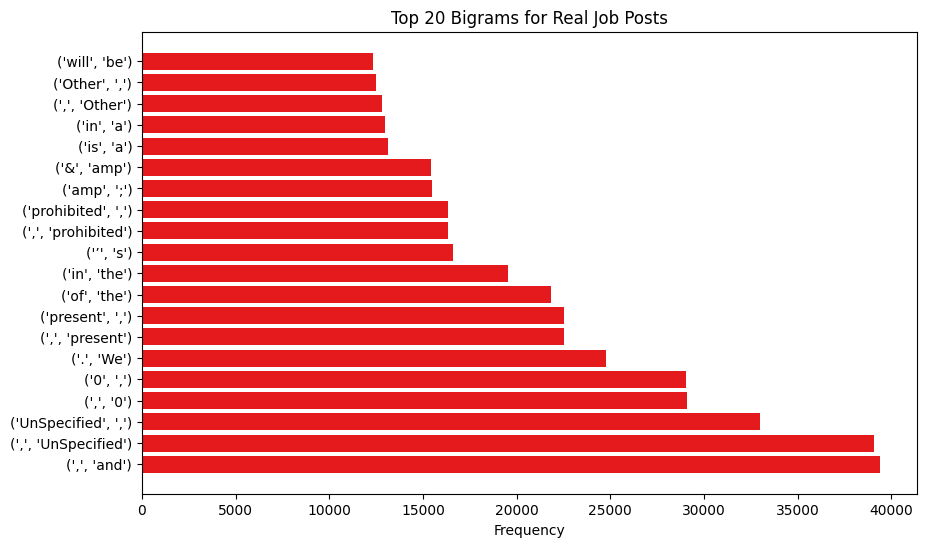

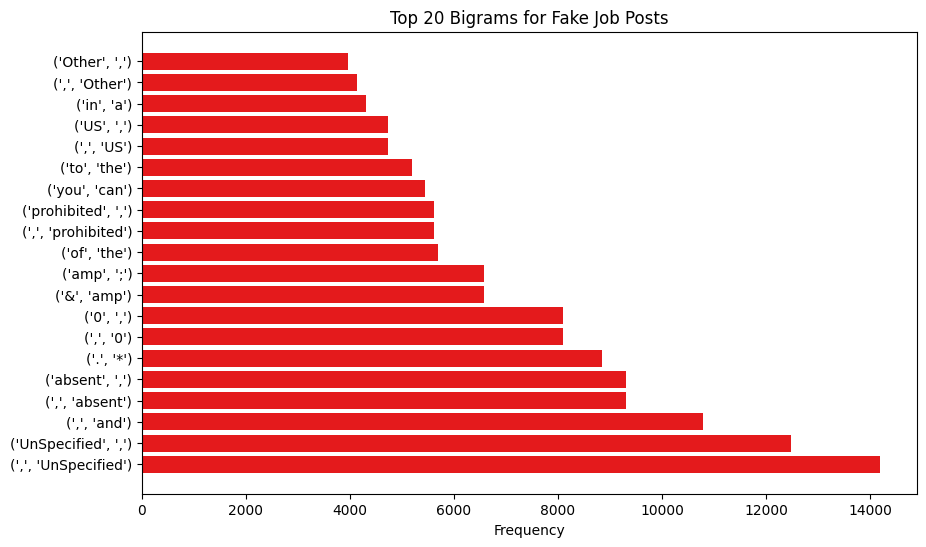

In [31]:
# Function to get top 20 bigrams
def get_top_bigrams(data):
    bigrams_list = list(bigrams(data))
    bigrams_count = Counter(bigrams_list)
    return dict(bigrams_count.most_common(20))

# Get top bigrams for real job posts
real_bigrams = get_top_bigrams(df_fake_job_pos_updated[df_fake_job_pos_updated['fraudulent'] == 0]['full_tokens_uncleaned_ngrams'].explode())

# Get top bigrams for fake job posts
fake_bigrams = get_top_bigrams(df_fake_job_pos_updated[df_fake_job_pos_updated['fraudulent'] == 1]['full_tokens_uncleaned_ngrams'].explode())

# Create bar graphs
def plot_bigrams(bigrams, title):
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(bigrams)), list(bigrams.values()), align='center')
    plt.yticks(range(len(bigrams)), list(bigrams.keys()))
    plt.title(title)
    plt.xlabel('Frequency')
    plt.show()

# Plot top bigrams for real job posts
plot_bigrams(real_bigrams, 'Top 20 Bigrams for Real Job Posts')

# Plot top bigrams for fake job posts
plot_bigrams(fake_bigrams, 'Top 20 Bigrams for Fake Job Posts')

In [32]:
# Function to get top 20 trigrams
def get_top_trigrams(data):
    trigrams_list = list(ngrams(data, 3))
    trigrams_count = Counter(trigrams_list)
    return trigrams_count.most_common(20)

# Get top trigrams for real job posts
real_trigrams = get_top_trigrams(df_fake_job_pos_updated[df_fake_job_pos_updated['fraudulent'] == 0]['full_tokens_uncleaned_ngrams'].explode())

# Get top trigrams for fake job posts
fake_trigrams = get_top_trigrams(df_fake_job_pos_updated[df_fake_job_pos_updated['fraudulent'] == 1]['full_tokens_uncleaned_ngrams'].explode())

# Print the results
print("Top 20 Trigrams for Real Job Posts:")
print(real_trigrams)

print("\nTop 20 Trigrams for Fake Job Posts:")
print(fake_trigrams)


Top 20 Trigrams for Real Job Posts:
[((',', 'UnSpecified', ','), 32972), ((',', '0', ','), 29067), ((',', 'present', ','), 22492), ((',', 'prohibited', ','), 16311), (('&', 'amp', ';'), 15454), (('0', ',', '0'), 14507), ((',', 'Other', ','), 12495), ((',', 'absent', ','), 11549), ((',', 'Full-time', ','), 11140), (('prohibited', ',', 'Full-time'), 10716), ((',', 'US', ','), 9945), (('UnSpecified', ',', '0'), 9667), (('absent', ',', 'prohibited'), 8171), (('present', ',', 'prohibited'), 8140), (('present', ',', 'present'), 7679), (('US', ',', 'UnSpecified'), 7193), (('present', ',', 'absent'), 6258), (('.', 'We', 'are'), 5858), (('UnSpecified', ',', 'Other'), 5386), (('UnSpecified', ',', 'UnSpecified'), 5301)]

Top 20 Trigrams for Fake Job Posts:
[((',', 'UnSpecified', ','), 12483), ((',', 'absent', ','), 9315), ((',', '0', ','), 8091), (('&', 'amp', ';'), 6579), ((',', 'prohibited', ','), 5622), ((',', 'US', ','), 4734), (('absent', ',', 'prohibited'), 4526), (('0', ',', '0'), 4032), (

In [33]:
#applying to columns
df_fake_job_pos_updated['full_tokens_cleaned'] = df_fake_job_pos_updated['full_text'].apply(description_lower)
df_fake_job_pos_updated['full_tokens_cleaned'] = df_fake_job_pos_updated['full_tokens_cleaned'].apply(description_tokenize)
df_fake_job_pos_updated['full_tokens_cleaned'] = df_fake_job_pos_updated['full_tokens_cleaned'].apply(description_alpha)
df_fake_job_pos_updated['full_tokens_cleaned'] = df_fake_job_pos_updated['full_tokens_cleaned'].apply(description_stopwords)
df_fake_job_pos_updated['full_tokens_cleaned'] = df_fake_job_pos_updated['full_tokens_cleaned'].apply(description_lemmatize)
df_fake_job_pos_updated['full_text_cleaned'] = df_fake_job_pos_updated['full_tokens_cleaned'].apply(detokenization)

In [34]:
df_fake_job_pos_updated

,job_id,title,extracted_country,department,minimum_salary,maximum_salary,company_profile,description,requirements,benefits,...,required_experience,mapped_education_level,mapped_industry,function,fraudulent,full_text,full_tokens_uncleaned_ngrams,full_uncleaned_text,full_tokens_cleaned,full_text_cleaned
0,1,Marketing Intern,US,Marketing,0,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,UnSpecified,...,Internship,Other,Other,Marketing,0,"Marketing Intern, US, Marketing, 0, 0, We're F...","[Marketing, Intern, ,, US, ,, Marketing, ,, 0,...","Marketing Intern , US , Marketing , 0 , 0 , We...","[marketing, intern, u, marketing, created, gro...",marketing intern u marketing created groundbre...
1,2,Customer Service - Cloud Video Production,NZ,Success,0,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,...,Not Applicable,Other,Marketing,Customer Service,0,"Customer Service - Cloud Video Production, NZ,...","[Customer, Service, -, Cloud, Video, Productio...","Customer Service - Cloud Video Production , NZ...","[customer, service, cloud, video, production, ...",customer service cloud video production nz suc...
2,3,Commissioning Machinery Assistant (CMA),US,UnSpecified,0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,UnSpecified,...,UnSpecified,Other,Other,UnSpecified,0,"Commissioning Machinery Assistant (CMA), US, U...","[Commissioning, Machinery, Assistant, (, CMA, ...","Commissioning Machinery Assistant ( CMA ) , US...","[commissioning, machinery, assistant, cma, u, ...",commissioning machinery assistant cma u unspec...
3,4,Account Executive - Washington DC,US,Sales,0,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,Mid-Senior level,Bachelor,Technology,Sales,0,"Account Executive - Washington DC, US, Sales, ...","[Account, Executive, -, Washington, DC, ,, US,...","Account Executive - Washington DC , US , Sales...","[account, executive, washington, dc, u, sale, ...",account executive washington dc u sale passion...
4,5,Bill Review Manager,US,UnSpecified,0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,Mid-Senior level,Bachelor,Healthcare,Health Care Provider,0,"Bill Review Manager, US, UnSpecified, 0, 0, Sp...","[Bill, Review, Manager, ,, US, ,, UnSpecified,...","Bill Review Manager , US , UnSpecified , 0 , 0...","[bill, review, manager, u, unspecified, spotso...",bill review manager u unspecified spotsource s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22875,3472,Licensed Practical Nurse,US,UnSpecified,0,0,Aker Solutions is a global provider of product...,Supervises assigned clerical employees and pro...,REQUIREMENTSBasic Qualifications:Proven experi...,Benefits: On board en suite accommodation and ...,...,Mid-Senior level,High School,Safety,Administrative,1,"Licensed Practical Nurse, US, UnSpecified, 0, ...","[Licensed, Practical, Nurse, ,, US, ,, UnSpeci...","Licensed Practical Nurse , US , UnSpecified , ...","[licensed, practical, nurse, u, unspecified, a...",licensed practical nurse u unspecified aker so...
22876,17832,Receptionist and Office Assistant,US,UnSpecified,0,0,UnSpecified,Account ManagerJoin a growing team that combin...,"Experience in maintenance, creating reports, a...",Benefits: On board en suite accommodation and ...,...,Entry level,Bachelor,Energy,Strategy/Planning,1,"Receptionist and Office Assistant, US, UnSpeci...","[Rece

In [35]:
print(df_fake_job_pos_updated['fraudulent'].value_counts())
#dataframe based on fraudulent status.
real_df = df_fake_job_pos_updated[df_fake_job_pos_updated['fraudulent'] == 0]
fraudulent_df = df_fake_job_pos_updated[df_fake_job_pos_updated['fraudulent'] == 1]

fraudulent
0    17014
1     5866
Name: count, dtype: int64


In [36]:
real_df

,job_id,title,extracted_country,department,minimum_salary,maximum_salary,company_profile,description,requirements,benefits,...,required_experience,mapped_education_level,mapped_industry,function,fraudulent,full_text,full_tokens_uncleaned_ngrams,full_uncleaned_text,full_tokens_cleaned,full_text_cleaned
0,1,Marketing Intern,US,Marketing,0,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,UnSpecified,...,Internship,Other,Other,Marketing,0,"Marketing Intern, US, Marketing, 0, 0, We're F...","[Marketing, Intern, ,, US, ,, Marketing, ,, 0,...","Marketing Intern , US , Marketing , 0 , 0 , We...","[marketing, intern, u, marketing, created, gro...",marketing intern u marketing created groundbre...
1,2,Customer Service - Cloud Video Production,NZ,Success,0,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,...,Not Applicable,Other,Marketing,Customer Service,0,"Customer Service - Cloud Video Production, NZ,...","[Customer, Service, -, Cloud, Video, Productio...","Customer Service - Cloud Video Production , NZ...","[customer, service, cloud, video, production, ...",customer service cloud video production nz suc...
2,3,Commissioning Machinery Assistant (CMA),US,UnSpecified,0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,UnSpecified,...,UnSpecified,Other,Other,UnSpecified,0,"Commissioning Machinery Assistant (CMA), US, U...","[Commissioning, Machinery, Assistant, (, CMA, ...","Commissioning Machinery Assistant ( CMA ) , US...","[commissioning, machinery, assistant, cma, u, ...",commissioning machinery assistant cma u unspec...
3,4,Account Executive - Washington DC,US,Sales,0,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,Mid-Senior level,Bachelor,Technology,Sales,0,"Account Executive - Washington DC, US, Sales, ...","[Account, Executive, -, Washington, DC, ,, US,...","Account Executive - Washington DC , US , Sales...","[account, executive, washington, dc, u, sale, ...",account executive washington dc u sale passion...
4,5,Bill Review Manager,US,UnSpecified,0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,Mid-Senior level,Bachelor,Healthcare,Health Care Provider,0,"Bill Review Manager, US, UnSpecified, 0, 0, Sp...","[Bill, Review, Manager, ,, US, ,, UnSpecified,...","Bill Review Manager , US , UnSpecified , 0 , 0...","[bill, review, manager, u, unspecified, spotso...",bill review manager u unspecified spotsource s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,CA,Sales,0,0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,...,Mid-Senior level,Other,Technology,Sales,0,"Account Director - Distribution , CA, Sales, 0...","[Account, Director, -, Distribution, ,, CA, ,,...","Account Director - Distribution , CA , Sales ,...","[account, director, distribution, ca, sale, ve...",account director distribution ca sale vend loo...
17876,17877,Payroll Accountant,US,Accounting,0,0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,Mid-Senior level,Bachelor,Technology,Accounting/Auditing,0,"Payroll Accountant, US, Accounting,

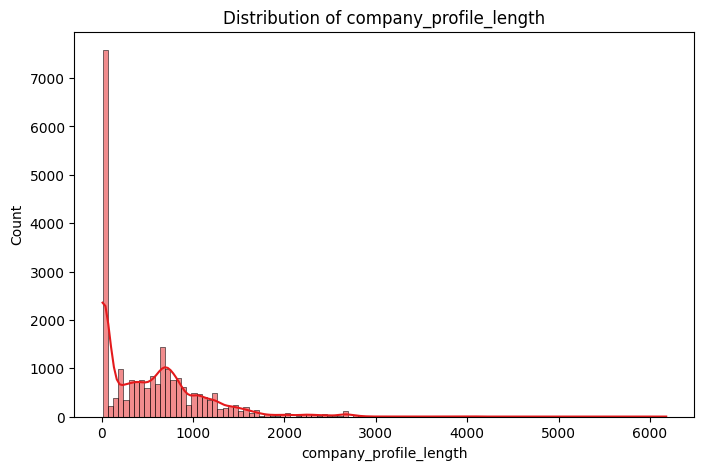

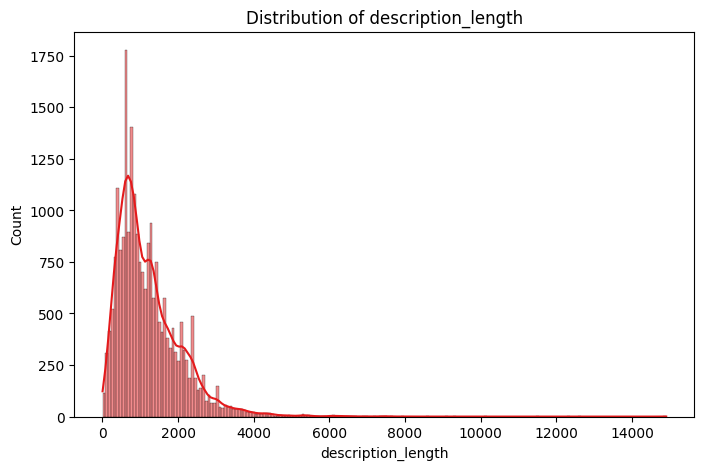

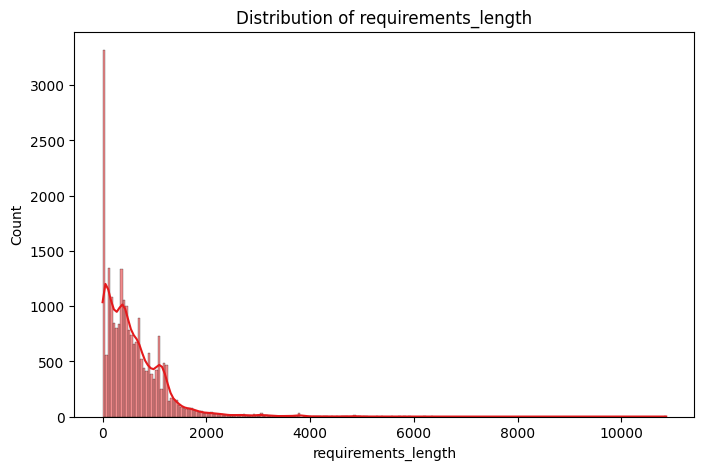

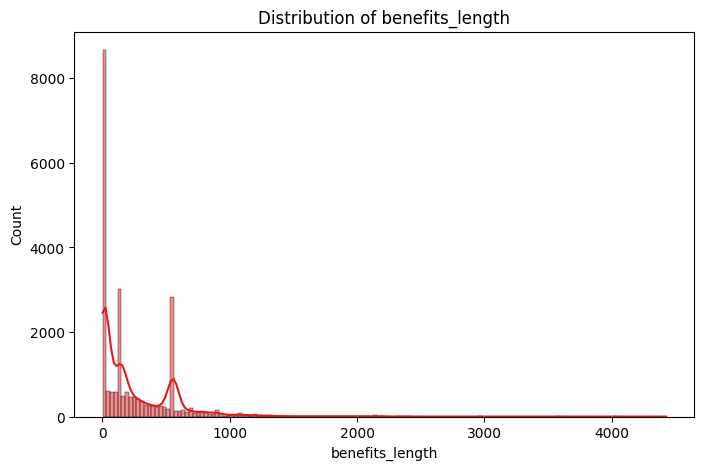

In [40]:
#plotting job requirements length
text_columns = df_fake_job_pos_updated[ ['company_profile', 'description', 'requirements', 'benefits']]

for column in text_columns:
    #lambda function to handle NaN values
    df_fake_job_pos_updated[f'{column}_length'] = df_fake_job_pos_updated[column].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

for column in [f'{column}_length' for column in text_columns]:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_fake_job_pos_updated[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

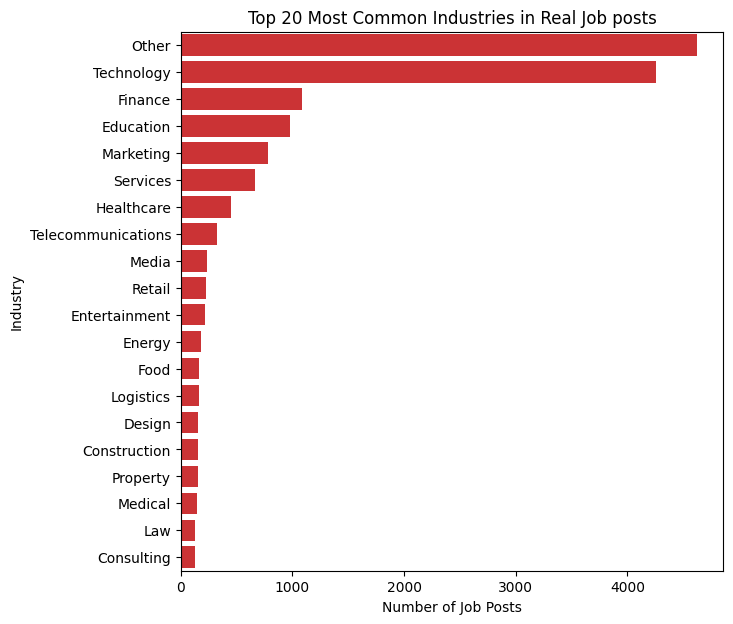

In [41]:
#plotting top 20 common inustries (real jobs)
industry = list(real_df['mapped_industry'])
counts = Counter(industry).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df.columns=['Industry', 'Number of Job Posts']
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.barplot(y='Industry', x='Number of Job Posts', ax=ax, data=counts_df)
plt.title("Top 20 Most Common Industries in Real Job posts")
plt.show()

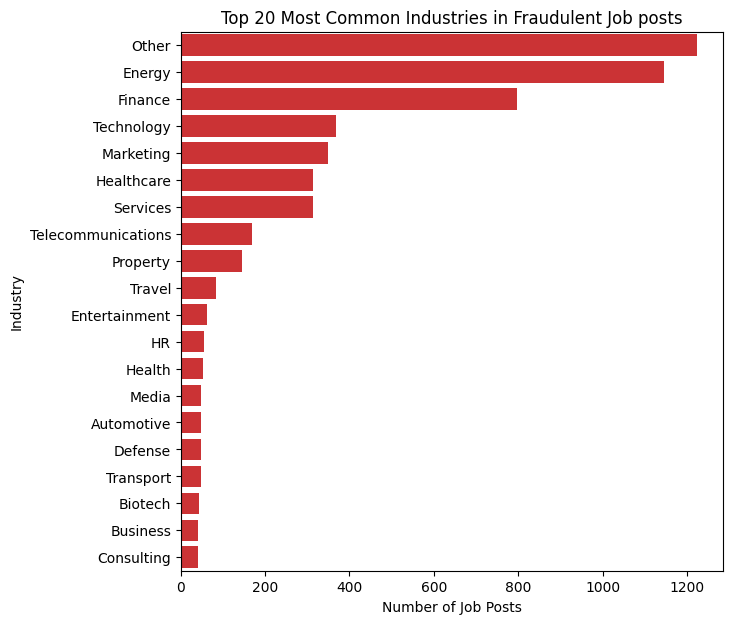

In [42]:
#plotting top 20 common inustries (fake jobs)
industry = list(fraudulent_df['mapped_industry'])
counts = Counter(industry).most_common(20)
counts_df = pd.DataFrame(counts)
counts_df.columns=['Industry', 'Number of Job Posts']
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.barplot(y='Industry', x='Number of Job Posts', ax=ax, data=counts_df)
plt.title("Top 20 Most Common Industries in Fraudulent Job posts")
plt.show()

#### Bigrams & Trigrams after cleaning text

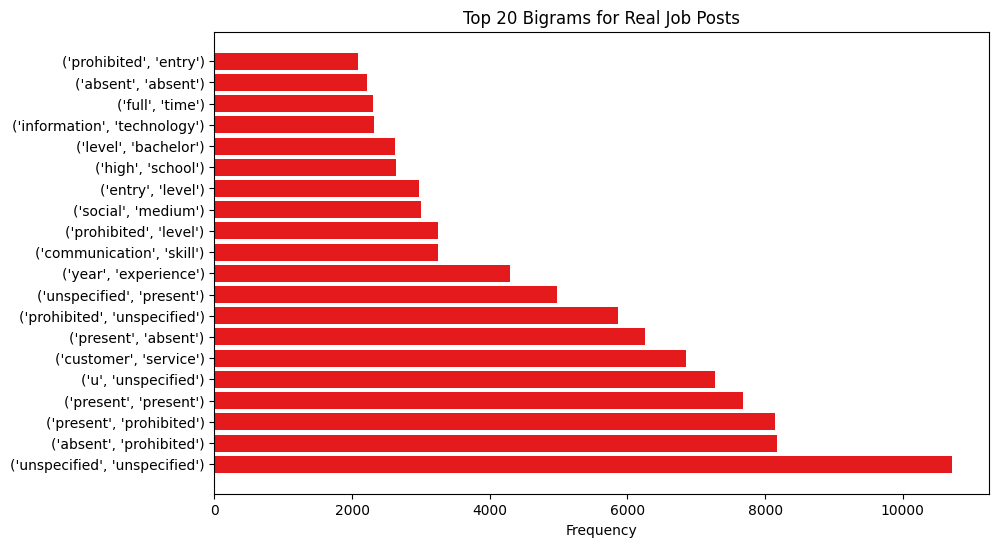

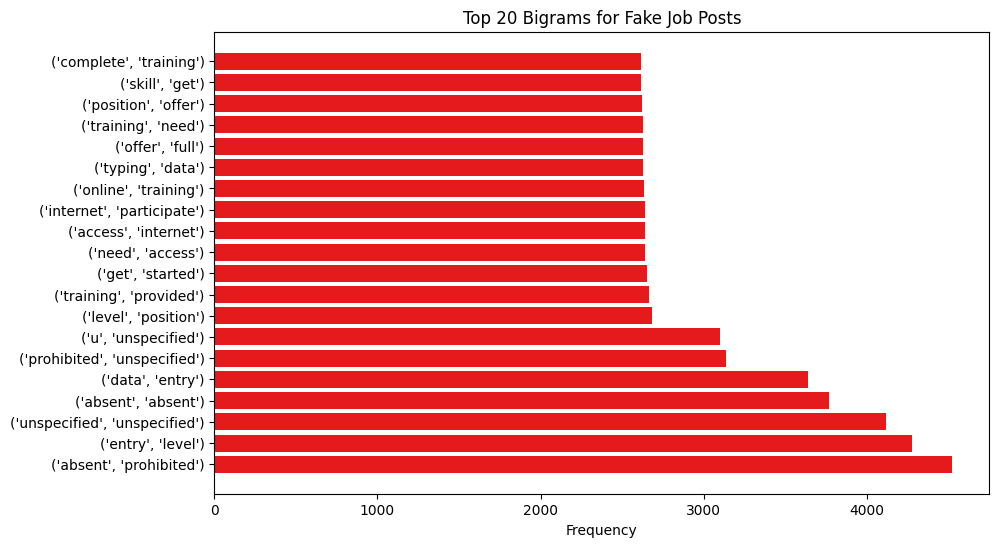

In [45]:
# Function to get top 20 bigrams
def get_top_bigrams(data):
    bigrams_list = list(bigrams(data))
    bigrams_count = Counter(bigrams_list)
    return dict(bigrams_count.most_common(20))

# Get top bigrams for real job posts
real_bigrams = get_top_bigrams(df_fake_job_pos_updated[df_fake_job_pos_updated['fraudulent'] == 0]['full_tokens_cleaned'].explode())

# Get top bigrams for fake job posts
fake_bigrams = get_top_bigrams(df_fake_job_pos_updated[df_fake_job_pos_updated['fraudulent'] == 1]['full_tokens_cleaned'].explode())

# Create bar graphs
def plot_bigrams(bigrams, title):
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(bigrams)), list(bigrams.values()), align='center')
    plt.yticks(range(len(bigrams)), list(bigrams.keys()))
    plt.title(title)
    plt.xlabel('Frequency')
    plt.show()

# Plot top bigrams for real job posts
plot_bigrams(real_bigrams, 'Top 20 Bigrams for Real Job Posts')

# Plot top bigrams for fake job posts
plot_bigrams(fake_bigrams, 'Top 20 Bigrams for Fake Job Posts')

In [46]:
# Function to get top 20 trigrams
def get_top_trigrams(data):
    trigrams_list = list(ngrams(data, 3))
    trigrams_count = Counter(trigrams_list)
    return trigrams_count.most_common(20)

# Get top trigrams for real job posts
real_trigrams = get_top_trigrams(df_fake_job_pos_updated[df_fake_job_pos_updated['fraudulent'] == 0]['full_tokens_cleaned'].explode())

# Get top trigrams for fake job posts
fake_trigrams = get_top_trigrams(df_fake_job_pos_updated[df_fake_job_pos_updated['fraudulent'] == 1]['full_tokens_cleaned'].explode())

# Print the results
print("Top 20 Trigrams for Real Job Posts:")
print(real_trigrams)

print("\nTop 20 Trigrams for Fake Job Posts:")
print(fake_trigrams)


Top 20 Trigrams for Real Job Posts:
[(('present', 'present', 'prohibited'), 7333), (('present', 'absent', 'prohibited'), 6044), (('prohibited', 'unspecified', 'unspecified'), 3707), (('absent', 'prohibited', 'unspecified'), 3309), (('unspecified', 'present', 'absent'), 3063), (('unspecified', 'unspecified', 'unspecified'), 2623), (('present', 'prohibited', 'unspecified'), 2554), (('absent', 'absent', 'prohibited'), 2127), (('prohibited', 'entry', 'level'), 2092), (('unspecified', 'present', 'present'), 1914), (('prohibited', 'level', 'bachelor'), 1742), (('absent', 'prohibited', 'level'), 1626), (('present', 'prohibited', 'level'), 1621), (('unspecified', 'absent', 'absent'), 1541), (('u', 'unspecified', 'unspecified'), 1302), (('unspecified', 'unspecified', 'present'), 1279), (('absent', 'prohibited', 'entry'), 1260), (('technology', 'information', 'technology'), 1251), (('level', 'high', 'school'), 1226), (('level', 'bachelor', 'technology'), 1209)]

Top 20 Trigrams for Fake Job Post

### WordCloud based cleaned text

In [47]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17014 entries, 0 to 17879
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   job_id                        17014 non-null  int64 
 1   title                         17014 non-null  object
 2   extracted_country             17014 non-null  object
 3   department                    17014 non-null  object
 4   minimum_salary                17014 non-null  Int64 
 5   maximum_salary                17014 non-null  Int64 
 6   company_profile               17014 non-null  object
 7   description                   17014 non-null  object
 8   requirements                  17014 non-null  object
 9   benefits                      17014 non-null  object
 10  has_company_logo_text         17014 non-null  object
 11  has_questions_text            17014 non-null  object
 12  telecommuting_text            17014 non-null  object
 13  employment_type      

In [48]:
fraudulent_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5866 entries, 98 to 22879
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   job_id                        5866 non-null   int64 
 1   title                         5866 non-null   object
 2   extracted_country             5866 non-null   object
 3   department                    5866 non-null   object
 4   minimum_salary                5866 non-null   Int64 
 5   maximum_salary                5866 non-null   Int64 
 6   company_profile               5866 non-null   object
 7   description                   5866 non-null   object
 8   requirements                  5866 non-null   object
 9   benefits                      5866 non-null   object
 10  has_company_logo_text         5866 non-null   object
 11  has_questions_text            5866 non-null   object
 12  telecommuting_text            5866 non-null   object
 13  employment_type      

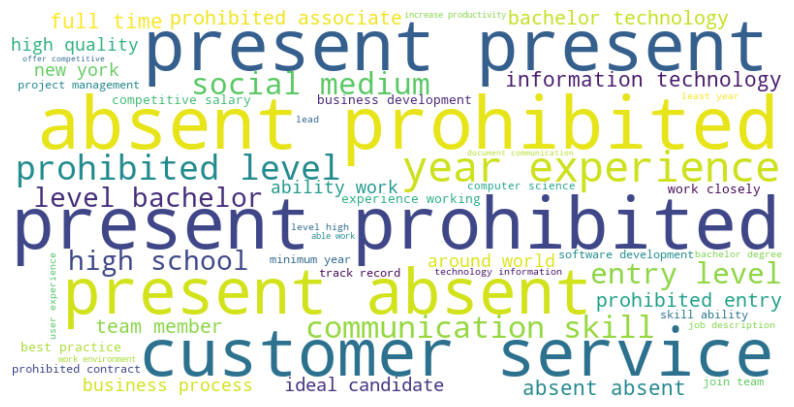

In [49]:
#word cloud for real_df
text_without_unspecified = ' '.join([word for text in real_df['full_text_cleaned'] for word in text.split() if word.lower() != 'unspecified'])
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(text_without_unspecified)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

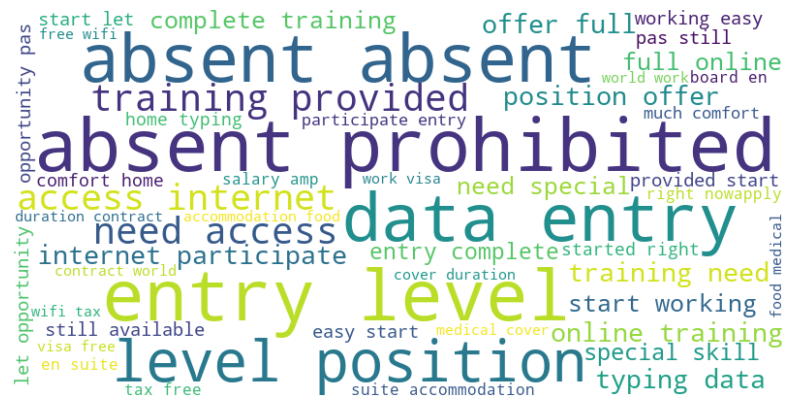

In [50]:
#word_cloud for fake_df
text_without_unspecified = ' '.join([word for text in fraudulent_df['full_text_cleaned'] for word in text.split() if word.lower() != 'unspecified'])
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(text_without_unspecified)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Splitting Data into Test and Train

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_fake_job_pos_updated['full_text_cleaned'], df_fake_job_pos_updated['fraudulent'], test_size=0.4,shuffle=True,random_state = 46)
print(f"Shape of X_train is {X_train.shape} and y_train is {y_train.shape}")
print(f"Shape of X_test is {X_test.shape} and y_train is {y_test.shape}")

X_train_tokens, X_test_tokens, y_train_tokens, y_test_tokens = train_test_split(df_fake_job_pos_updated['full_tokens_cleaned'], df_fake_job_pos_updated['fraudulent'], test_size=0.4,shuffle=True,random_state = 46)
print(f"Shape of X_train is {X_train.shape} and y_train is {y_train.shape}")
print(f"Shape of X_test is {X_test.shape} and y_train is {y_test.shape}")

Shape of X_train is (13728,) and y_train is (13728,)
Shape of X_test is (9152,) and y_train is (9152,)
Shape of X_train is (13728,) and y_train is (13728,)
Shape of X_test is (9152,) and y_train is (9152,)


### Vectorizing Job Postings

#### TFIDF

In [52]:
#TFID Matrix for model
def calculate_tfidf_for_training_data(train_data):
    tfidf_vectorizer = TfidfVectorizer(min_df = 0.01, max_df = 0.99,analyzer = 'word')
    tfidf_train_matrix = tfidf_vectorizer.fit_transform(train_data)
    tfidf_train_matrix
    print(tfidf_train_matrix.shape)
    return tfidf_train_matrix, tfidf_vectorizer


In [53]:
#TFID Matrix for model
def calculate_tfidf_for_testing(test_data,tfidf_vectorizer):
    tfidf_matrix = tfidf_vectorizer.transform(test_data)
    tfidf_matrix
    print(tfidf_matrix.shape)
    return tfidf_matrix


#### Count Vectorization

In [54]:
#CoutVect Matrix for model
def calculate_cntvect_for_training_data(train_data):
    cnt_vectorizer = CountVectorizer(min_df = 0.01, max_df = 0.99,analyzer = 'word')
    #fit and transform the text data to calculate TFIDF
    cnt_train_matrix = cnt_vectorizer.fit_transform(train_data)
    cnt_train_matrix
    print(cnt_train_matrix.shape)
    return cnt_train_matrix, cnt_vectorizer


In [55]:
#CountVect Matrix for model(testing)
def calculate_cntvect_for_testing(test_data,cnt_vectorizer):
    cnt_matrix = cnt_vectorizer.transform(test_data)
    cnt_matrix
    print(cnt_matrix.shape)
    return cnt_matrix

#### PCA- Dimension Reduction

In [56]:
#PCA dimensionality reduction
def reduce_dimension(X_train,X_test,no_of_dimensions):
  pca = TruncatedSVD(n_components=no_of_dimensions)
  x_train_reduced = pca.fit_transform(X_train.toarray())
  x_test_reduced = pca.transform(X_test.toarray())
  return x_train_reduced,x_test_reduced

#### Word2Vec

In [57]:
#training Word2Vec Model on train_data
def word2vec_train_test(train_data, vector_size=100, window=5, min_count=1, workers=4):
    word2vec_model = gensim.models.Word2Vec(sentences=train_data, vector_size=vector_size, window=window,
                                            min_count=min_count, workers=workers)
    return word2vec_model

In [58]:
#Word2Vec embeddings for training data
def word2vec_transform(data, word2vec_model):
    vect_data = np.array([np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(word2vec_model.vector_size)], axis=0) for words in data])
    return vect_data

## Results

### Classification Report

In [59]:
def get_classification_report(y_test,y_pred):
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

### Confusion Matrix

In [60]:
def get_confusion_matrix(y_test,y_pred):
  conf_matrix = confusion_matrix(y_test, y_pred)
  print('Confusion Matrix:')
  print(conf_matrix)
  #plot_confusion_matrix(classifier, X_test, y_test)

## Models

### Naive Bayes

In [61]:
#Classifying Naive Bayes Classifier
def naivebayes_classification(X_train,y_train,X_test,y_test):
  nb_classifier = MultinomialNB(alpha=0.6)
  nb_classifier.fit(X_train, y_train)
  y_pred = nb_classifier.predict(X_test)
  get_classification_report(y_test,y_pred)
  get_confusion_matrix(y_test,y_pred)

### Random Forest


In [62]:
#Classifying Random Forest Classifier
def randomforest_classification(X_train,y_train,X_test,y_test):
  rf_classifier = RandomForestClassifier( n_estimators=100,
                                         max_depth=5,
                                          min_samples_split=5,
                                          min_samples_leaf=2,
                                          max_features='sqrt')
  rf_classifier.fit(X_train, y_train)
  y_pred = rf_classifier.predict(X_test)
  get_classification_report(y_test,y_pred)
  get_confusion_matrix(y_test,y_pred)

### SVM

In [63]:
#Classifying Random Forest Classifier
def svm_classification(X_train,y_train,X_test,y_test):
  svm_classifier= SVC(kernel='linear',C=0.5)
  svm_classifier.fit(X_train, y_train)
  y_pred = svm_classifier.predict(X_test)
  get_classification_report(y_test,y_pred)
  get_confusion_matrix(y_test,y_pred)

### RNN & LSTM (TFIDF & Count Vect)

In [64]:
#RNN function
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#LSTM function
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Testing

### TFIDF

In [65]:
from sklearn.preprocessing import normalize

#Step1: TFIDF Vectorizing data
tfidf_train_matrix, tfidf_vectorizer= calculate_tfidf_for_training_data(X_train)
tfidf_matrix_test = calculate_tfidf_for_testing(X_test,tfidf_vectorizer)


#Step2: Traing Model and getting predictions
# #Naive Bayes Model
print('Naive Bayes:')
naivebayes_classification(tfidf_train_matrix,y_train,tfidf_matrix_test,y_test)

# #Step 1.1: Reducing Dimensions
print('Reducing Dimensions')
tfidf_train_matrix,tfidf_matrix_test = reduce_dimension(tfidf_train_matrix,tfidf_matrix_test,230)

# #Step 1.2: Normalizing data
tfidf_train_matrix = normalize(tfidf_train_matrix)
tfidf_matrix_test = normalize(tfidf_matrix_test)

#Random Forest
print('Random Forest:')
randomforest_classification(tfidf_train_matrix,y_train,tfidf_matrix_test,y_test)

#SVM
print('SVM Classifier:')
svm_classification(tfidf_train_matrix,y_train,tfidf_matrix_test,y_test)

(13728, 2349)
(9152, 2349)
Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6810
           1       0.99      0.88      0.93      2342

    accuracy                           0.97      9152
   macro avg       0.98      0.94      0.96      9152
weighted avg       0.97      0.97      0.97      9152

Confusion Matrix:
[[6799   11]
 [ 279 2063]]
Reducing Dimensions
Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6810
           1       1.00      0.72      0.83      2342

    accuracy                           0.93      9152
   macro avg       0.95      0.86      0.89      9152
weighted avg       0.93      0.93      0.92      9152

Confusion Matrix:
[[6806    4]
 [ 663 1679]]
SVM Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.

###Word2vec testing

In [67]:
#X_train_tokens, X_test_tokens, y_train_tokens, y_test_tokens

#Step1: Vectorizing data with word2vec
trained_word2vec_model = word2vec_train_test(X_train_tokens)

# train_data transform to embeddings
x_train_matrix = word2vec_transform(X_train_tokens, trained_word2vec_model)
x_test_matrix = word2vec_transform(X_test_tokens, trained_word2vec_model)

#Step2: Traing Model and getting predictions
#Naive Bayes
#We are not executing Naive Bayes as it coundn't handle negative values.
#Random Forest
print('Random Forest:')
randomforest_classification(x_train_matrix,y_train_tokens,x_test_matrix,y_test_tokens)

#SVM
print('SVM Classifier:')
svm_classification(x_train_matrix,y_train_tokens,x_test_matrix,y_test_tokens)

Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6810
           1       0.98      0.78      0.87      2342

    accuracy                           0.94      9152
   macro avg       0.95      0.89      0.91      9152
weighted avg       0.94      0.94      0.94      9152

Confusion Matrix:
[[6774   36]
 [ 522 1820]]
SVM Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6810
           1       0.97      0.89      0.93      2342

    accuracy                           0.97      9152
   macro avg       0.97      0.94      0.95      9152
weighted avg       0.97      0.97      0.97      9152

Confusion Matrix:
[[6742   68]
 [ 248 2094]]


In [68]:
import sys
!{sys.executable} -m pip install keras

## RNN + LSTM

In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [70]:
import numpy as np



#TF-IDF matrices reshaped for compatibility with the models
max_len = tfidf_train_matrix.shape[1]

X_train_rnn = tfidf_train_matrix.reshape(-1, max_len, 1)
X_test_rnn = tfidf_matrix_test.reshape(-1, max_len, 1)


#Using RNN
rnn_model = create_rnn_model(X_train_rnn.shape[1:])
rnn_model.summary()

#Using LSTM
lstm_model = create_lstm_model(X_train_rnn.shape[1:])
lstm_model.summary()

c:\Users\manor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 230, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 230, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 230, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,889 (710.50 KB)

 Trainable params: 181,889 (710.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 230, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 230, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 230, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,889 (710.50 KB)

 Trainable params: 181,889 (710.50 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# RNN model
rnn_model.fit(X_train_rnn, y_train, epochs=15, batch_size=32, validation_split=0.2)

# LSTM model
lstm_model.fit(X_train_rnn, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 156s 425ms/step - accuracy: 0.7410 - loss: 0.5670 - val_accuracy: 0.7480 - val_loss: 0.5129
Epoch 2/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 133s 386ms/step - accuracy: 0.7795 - loss: 0.4591 - val_accuracy: 0.8795 - val_loss: 0.2936
Epoch 3/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 135s 391ms/step - accuracy: 0.8863 - loss: 0.2675 - val_accuracy: 0.9508 - val_loss: 0.1677
Epoch 4/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 134s 390ms/step - accuracy: 0.9366 - loss: 0.1753 - val_accuracy: 0.9508 - val_loss: 0.1591
Epoch 5/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 139s 405ms/step - accuracy: 0.9442 - loss: 0.1634 - val_accuracy: 0.9541 - val_loss: 0.1468
Epoch 6/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 213s 619ms/step - accuracy: 0.9519 - loss: 0.1484 - val_accuracy: 0.9599 - val_loss: 0.1301
Epoch 7/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 187s 399ms/step - accuracy: 0.9519 - loss: 0.1385 - val_accuracy: 0.9596 - val_loss: 0.1214
Epoch 8/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 127s 370ms/step - accuracy: 0.9573 -

In [72]:
# Predictions on test data using the trained model
predictions_rnn = rnn_model.predict(X_test_rnn)
predictions_lstm = lstm_model.predict(X_test_rnn)
# Predicted probabilities to labels (0 or 1)
predicted_labels_rnn = (predictions_rnn > 0.5).astype(int)
predicted_labels_lstm = (predictions_lstm > 0.5).astype(int)
# Classification report
print("Classification Report for LSTM Model for TFIDF:")
print(classification_report(y_test, predicted_labels_lstm))
print("Classification Report for RNN Model for TFIDF:")
print(classification_report(y_test, predicted_labels_rnn))

286/286 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step
286/286 ━━━━━━━━━━━━━━━━━━━━ 39s 132ms/step
Classification Report for LSTM Model for TFIDF:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6810
           1       0.97      0.90      0.93      2342

    accuracy                           0.97      9152
   macro avg       0.97      0.95      0.96      9152
weighted avg       0.97      0.97      0.97      9152

Classification Report for RNN Model for TFIDF:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6810
           1       0.97      0.88      0.92      2342

    accuracy                           0.96      9152
   macro avg       0.96      0.93      0.95      9152
weighted avg       0.96      0.96      0.96      9152



In [75]:
#RNN model with additional layers
rnn_model.fit(X_train_rnn, y_train, epochs=15, batch_size=32, validation_split=0.2)

#Fiting LSTM model with additional layers
lstm_model.fit(X_train_rnn, y_train, epochs=15, batch_size=32, validation_split=0.2)

#Make predictions on the test set
y_pred_rnn = rnn_model.predict(X_test_rnn)
y_pred_lstm = lstm_model.predict(X_test_rnn)

#Treshold predictions to binary (0 or 1)
y_pred_rnn_binary = (y_pred_rnn > 0.5).astype(int)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)

#classification report for RNN
print("Classification Report for RNN Model for Count Vectorization:")
print(classification_report(y_test, y_pred_rnn_binary))
print("Classification Report for LSTM Model for Count Vectorization:")
#classification report for LSTM
print(classification_report(y_test, y_pred_lstm_binary))

Epoch 1/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 140s 384ms/step - accuracy: 0.8276 - loss: 0.3827 - val_accuracy: 0.9068 - val_loss: 0.2428
Epoch 2/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 127s 368ms/step - accuracy: 0.9204 - loss: 0.2201 - val_accuracy: 0.9312 - val_loss: 0.1889
Epoch 3/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 131s 380ms/step - accuracy: 0.9276 - loss: 0.1901 - val_accuracy: 0.9224 - val_loss: 0.2183
Epoch 4/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 128s 371ms/step - accuracy: 0.9427 - loss: 0.1634 - val_accuracy: 0.9381 - val_loss: 0.1693
Epoch 5/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 130s 377ms/step - accuracy: 0.9500 - loss: 0.1472 - val_accuracy: 0.9359 - val_loss: 0.2043
Epoch 6/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 129s 374ms/step - accuracy: 0.9482 - loss: 0.1538 - val_accuracy: 0.9468 - val_loss: 0.1605
Epoch 7/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 130s 378ms/step - accuracy: 0.9521 - loss: 0.1357 - val_accuracy: 0.9476 - val_loss: 0.1542
Epoch 8/15
344/344 ━━━━━━━━━━━━━━━━━━━━ 130s 377ms/step - accuracy: 0.9575 -

In [ ]:
#RNN Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout
from gensim.models import Word2Vec


#preprocessing steps(tokenization, lowercasing, etc.)
df_fake_job_pos_updated['text'] = df_fake_job_pos_updated['full_text_cleaned'].apply(lambda x: x.lower().split())

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df_fake_job_pos_updated['text'],
    df_fake_job_pos_updated['fraudulent'],
    test_size=0.2,
    random_state=42
)

#tokenizing and padding sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_len = max(max(len(seq) for seq in X_train_sequences), max(len(seq) for seq in X_test_sequences))
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post')

#training Word2Vec model
word2vec_model = Word2Vec(sentences=df_fake_job_pos_updated['text'], vector_size=100, window=5, min_count=1, workers=4)

#Word2Vec embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

#RNN with Word2Vec embedding
def create_rnn_model_with_word2vec(input_shape, embedding_matrix):
    model = Sequential()
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        input_length=input_shape[0],
        weights=[embedding_matrix],
        trainable=False
    ))
    model.add(LSTM(64, return_sequences=True))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#training and evaluation
rnn_model = create_rnn_model_with_word2vec(input_shape=(max_len,), embedding_matrix=embedding_matrix)
rnn_model.fit(X_train_padded, y_train, epochs=15, batch_size=64, validation_split=0.2)

#evaluation on test set
rnn_results = rnn_model.evaluate(X_test_padded, y_test)
print(f'RNN Test Accuracy: {rnn_results[1]*100:.2f}%')

#LSTM model with Word2Vec embedding
def create_lstm_model_with_word2vec(input_shape, embedding_matrix):
    model = Sequential()
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        input_length=input_shape[0],
        weights=[embedding_matrix],
        trainable=False
    ))
    model.add(LSTM(64, return_sequences=True))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#training and evaluation of LSTM model
lstm_model = create_lstm_model_with_word2vec(input_shape=(max_len,), embedding_matrix=embedding_matrix)
lstm_model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

#evaluation on test set
lstm_results = lstm_model.evaluate(X_test_padded, y_test)
print(f'LSTM Test Accuracy: {lstm_results[1]*100:.2f}%')


c:\Users\manor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 2490s 11s/step - accuracy: 0.8856 - loss: 0.2564 - val_accuracy: 0.9790 - val_loss: 0.0688
Epoch 2/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 4197s 18s/step - accuracy: 0.9827 - loss: 0.0511 - val_accuracy: 0.9820 - val_loss: 0.0568
Epoch 3/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 3332s 15s/step - accuracy: 0.9913 - loss: 0.0300 - val_accuracy: 0.9855 - val_loss: 0.0443
Epoch 4/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 2727s 12s/step - accuracy: 0.9932 - loss: 0.0222 - val_accuracy: 0.9872 - val_loss: 0.0448
Epoch 5/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 2400s 10s/step - accuracy: 0.9939 - loss: 0.0215 - val_accuracy: 0.9861 - val_loss: 0.0466
Epoch 6/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 8701s 38s/step - accuracy: 0.9961 - loss: 0.0128 - val_accuracy: 0.9852 - val_loss: 0.0486
Epoch 7/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 2911s 13s/step - accuracy: 0.9966 - loss: 0.0115 - val_accuracy: 0.9842 - val_loss: 0.0536
Epoch 8/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 2560s 11s/step - accuracy: 0.9974 - loss: 0

In [ ]:
#RNN with Word2Vec embedding
rnn_model.summary()

#LSTM with Word2Vec embedding
lstm_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1336, 100)         7777500   
                                                                 
 lstm_30 (LSTM)              (None, 1336, 64)          42240     
                                                                 
 bidirectional_20 (Bidirect  (None, 1336, 128)         66048     
 ional)                                                          
                                                                 
 dropout_20 (Dropout)        (None, 1336, 128)         0         
                                                                 
 bidirectional_21 (Bidirect  (None, 128)               98816     
 ional)                                                          
                                                                 
 dropout_21 (Dropout)        (None, 128)             

In [ ]:
# Fit and predict RNN model
rnn_predictions = rnn_model.predict(X_test_padded)
rnn_predicted_labels = (rnn_predictions > 0.5).astype(int)

# Classification report for RNN
from sklearn.metrics import classification_report
print("RNN Classification Report:")
print(classification_report(y_test, rnn_predicted_labels))

# Fit and predict LSTM model
lstm_predictions = lstm_model.predict(X_test_padded)
lstm_predicted_labels = (lstm_predictions > 0.5).astype(int)

# Classification report for LSTM
print("LSTM Classification Report:")
print(classification_report(y_test, lstm_predicted_labels))

143/143 [==============================] - 13s 83ms/step
RNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3404
           1       0.98      0.97      0.98      1172

    accuracy                           0.99      4576
   macro avg       0.99      0.98      0.99      4576
weighted avg       0.99      0.99      0.99      4576

143/143 [==============================] - 13s 79ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3404
           1       0.98      0.97      0.98      1172

    accuracy                           0.99      4576
   macro avg       0.99      0.98      0.99      4576
weighted avg       0.99      0.99      0.99      4576



In [ ]:
import joblib
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Create the directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Combine all text into a single series for training the final model
X_full = df_fake_job_pos_updated['full_text_cleaned']
y_full = df_fake_job_pos_updated['fraudulent']

# Define the components of your pipeline
tfidf_vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.99, analyzer='word')
svd = TruncatedSVD(n_components=230)
svm_classifier = SVC(kernel='linear', C=0.5, probability=True) # probability=True is good practice

# Create a full pipeline
pipeline = make_pipeline(tfidf_vectorizer, svd, svm_classifier)

# Train the pipeline on the ENTIRE dataset
print("Training final model on the full dataset...")
pipeline.fit(X_full, y_full)
print("Training complete.")

# Save the entire pipeline as a single file
joblib.dump(pipeline, 'models/pipeline.joblib')

